/tmp/ipython-input-1-1203661654.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="6mo")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1203661654.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  risk_data = pd.concat([risk_data, new_row], ignore_index=True)
/tmp/ipython-input-1-1203661654.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="6mo")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-1203661654.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker

Risk Bucket Classification:
      Stock  Volatility (%) Risk Level
0       TCS            1.37     Medium
1      INFY            1.73     Medium
2  HDFCBANK            1.16        Low
3  RELIANCE            1.41     Medium
4       ITC            1.06        Low


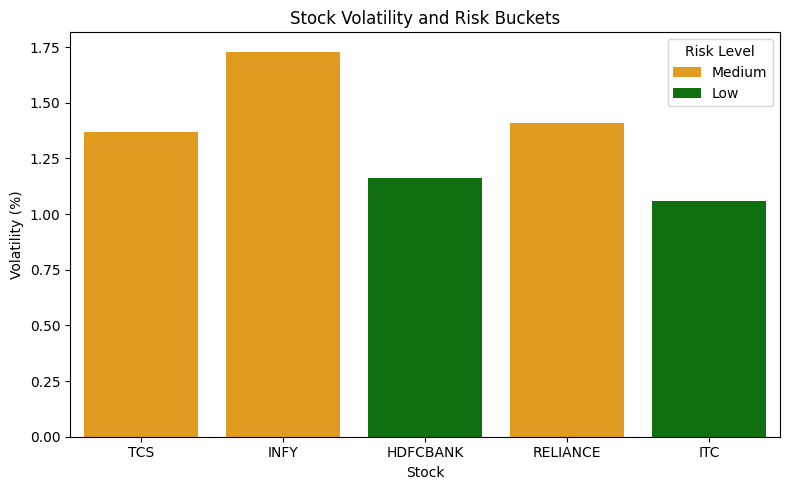

Risk classification saved to 'Day8_Risk_Buckets.csv'


In [1]:
# Day 8: Risk Bucket Classification Based on Volatility

# Install required packages
!pip install yfinance

# Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define portfolio tickers
portfolio = ["TCS.NS", "INFY.NS", "HDFCBANK.NS", "RELIANCE.NS", "ITC.NS"]

# Create empty DataFrame
risk_data = pd.DataFrame(columns=["Stock", "Volatility (%)", "Risk Level"])

# Loop through stocks
for ticker in portfolio:
    data = yf.download(ticker, period="6mo")
    data["Daily Return"] = data["Close"].pct_change()
    volatility = data["Daily Return"].std() * 100

    if volatility < 1.2:
        risk_level = "Low"
    elif 1.2 <= volatility < 2:
        risk_level = "Medium"
    else:
        risk_level = "High"

    new_row = pd.DataFrame([{
        "Stock": ticker.replace(".NS", ""),
        "Volatility (%)": round(volatility, 2),
        "Risk Level": risk_level
    }])

    risk_data = pd.concat([risk_data, new_row], ignore_index=True)

# Print results
print("Risk Bucket Classification:")
print(risk_data)

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=risk_data, x="Stock", y="Volatility (%)", hue="Risk Level",
            palette={"Low": "green", "Medium": "orange", "High": "red"})

plt.title("Stock Volatility and Risk Buckets")
plt.xlabel("Stock")
plt.ylabel("Volatility (%)")
plt.tight_layout()
plt.show()

# Export to CSV
risk_data.to_csv("Day8_Risk_Buckets.csv", index=False)
print("Risk classification saved to 'Day8_Risk_Buckets.csv'")